<a href="https://colab.research.google.com/github/pedrodeparis/MultipleLinearRegression/blob/main/Multiple_linear_regression_Car_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
le.fit(car.CarName)
car.CarName = le.transform(car.CarName)

le.fit(car.fueltype)
car.fueltype = le.transform(car.fueltype)

le.fit(car.aspiration)
car.aspiration = le.transform(car.aspiration)

le.fit(car.doornumber)
car.doornumber = le.transform(car.doornumber)

le.fit(car.carbody)
car.carbody = le.transform(car.carbody)

le.fit(car.enginelocation)
car.enginelocation = le.transform(car.enginelocation)

le.fit(car.drivewheel)
car.drivewheel = le.transform(car.drivewheel)

le.fit(car.fuelsystem)
car.fuelsystem = le.transform(car.fuelsystem)

le.fit(car.enginetype)
car.enginetype = le.transform(car.enginetype)

le.fit(car.cylindernumber)
car.cylindernumber = le.transform(car.cylindernumber)


<Axes: xlabel='price', ylabel='Count'>

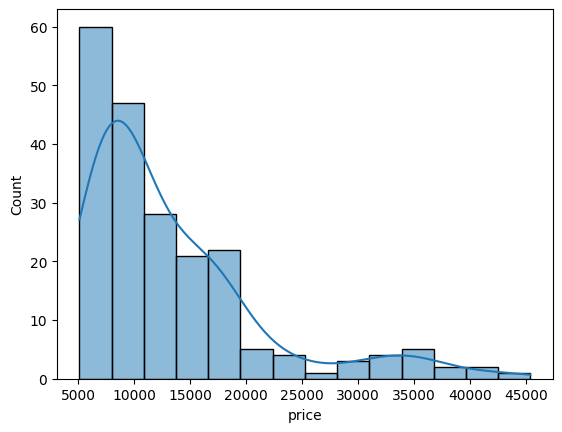

In [30]:
sns.histplot(car, x="price", kde = True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
car_norm = pd.DataFrame(scaler.fit_transform(car), index=car.index, columns = car.columns)
car_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [34]:
import statsmodels.formula.api as smf

In [35]:
function = 'price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     82.62
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.50e-78
Time:                        02:57:14   Log-Likelihood:                 266.45
No. Observations:                 205   AIC:                            -494.9
Df Residuals:                     186   BIC:                            -431.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0029      0.187  

In [37]:
function = 'price~+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     87.75
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.89e-79
Time:                        02:58:02   Log-Likelihood:                 266.24
No. Observations:                 205   AIC:                            -496.5
Df Residuals:                     187   BIC:                            -436.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0134      0.185  

In [48]:
function = 'price~+CarName+carbody+enginelocation+carwidth+carheight+wheelbase+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1'
model = smf.ols(formula=function, data=car_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              291.4
Date:                Sun, 31 Dec 2023   Prob (F-statistic):                   1.36e-116
Time:                        03:05:29   Log-Likelihood:                          270.24
No. Observations:                 205   AIC:                                     -516.5
Df Residuals:                     193   BIC:                                     -476.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [62]:
x = car_norm[["CarName", "carbody", "enginelocation", "carwidth", "carheight", "wheelbase", "curbweight", "enginesize", "stroke", "compressionratio", "horsepower", "peakrpm"]]
y = car_norm[["price"]]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
r = lr.score(x_train, y_train)
print(r)

0.9072087332490308


In [67]:
y_pred_treino = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_treino))


MAE: 0.04542289346146708
MSE: 0.0034328394786590478


In [68]:
y_pred_teste = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_teste))

MAE: 0.06256820583467826
MSE: 0.007842414727416485
